1/1 [==============================] - 0s 358ms/step


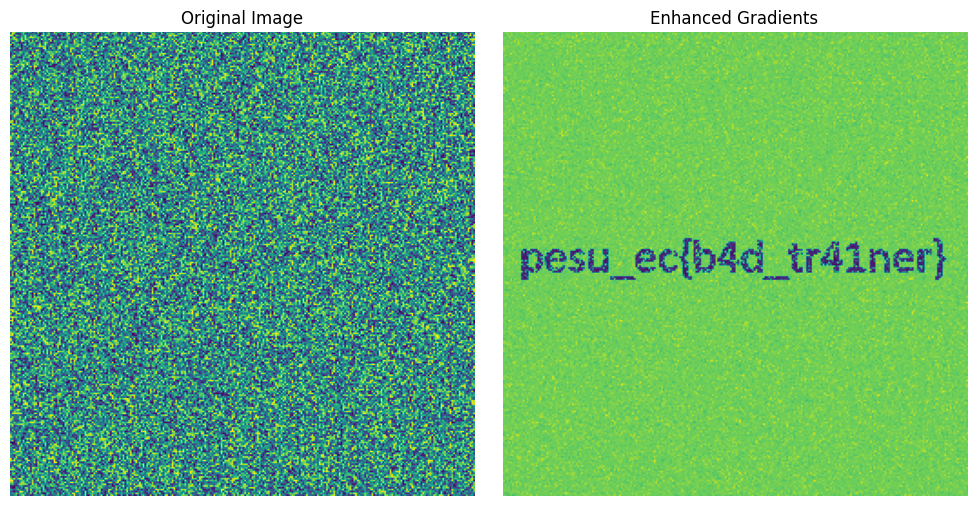

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def enhance_gradients(input_image, model, class_index=None):
    if class_index is None:
        class_index = np.argmax(model.predict(input_image)[0])

    input_tensor = tf.convert_to_tensor(input_image)
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
        target_output = predictions[0][class_index]

    grads = tape.gradient(target_output, input_tensor)
    normalized_grads = grads / (tf.sqrt(tf.reduce_mean(tf.square(grads))) + tf.keras.backend.epsilon())
    enhanced_gradients = normalized_grads.numpy()[0]

    return enhanced_gradients

img = np.random.randint(0, 256, size=(256, 256), dtype=np.uint8)

img_array = img_to_array(img)
preprocessed_img = tf.cast(img_array, tf.float32) / 255.0
input_image = np.expand_dims(preprocessed_img, axis=0)

model = load_model('model.h5')

enhanced_gradients = enhance_gradients(input_image, model)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array[..., 0])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_gradients[..., 0])
plt.title('Enhanced Gradients')
plt.axis('off')

plt.tight_layout()
plt.show()
